# Random Forest Regression|


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import plot_tree


### Data Preparation

In [106]:
#import cleaned data set 
customerdf = pd.read_csv("https://raw.githubusercontent.com/dcjh/1015_Mini_Project/main/Datasets/cleaned_customer.csv") 
customerdf = customerdf[['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer', 'Recency']]
customerdf

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dt_Customer,Recency
0,58138.0,8,10,4,635,88,546,172,88,88,04-09-2012,58
1,46344.0,1,1,2,11,1,6,2,1,6,08-03-2014,38
2,71613.0,8,2,10,426,49,127,111,21,42,21-08-2013,26
3,26646.0,2,0,4,11,4,20,10,3,5,10-02-2014,26
4,58293.0,5,3,6,173,43,118,46,27,15,19-01-2014,94
...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,9,3,4,709,43,182,42,118,247,13-06-2013,46
2212,64014.0,8,2,5,406,0,30,0,0,8,10-06-2014,56
2213,56981.0,2,3,13,908,48,217,32,12,24,25-01-2014,91
2214,69245.0,6,5,10,428,30,214,80,30,61,24-01-2014,8


In [107]:
customerdf['Dt_Customer'] = pd.to_datetime(customerdf['Dt_Customer'], format='%d-%m-%Y')
customerdf['CurrentDate'] = datetime.datetime(2021, 1, 1)
customerdf['numMonths'] = (customerdf['CurrentDate'] - customerdf['Dt_Customer']) / np.timedelta64(1, 'D') / 30
customerdf['Recency'] = customerdf['Recency'] / 30
customerdf

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dt_Customer,Recency,CurrentDate,numMonths
0,58138.0,8,10,4,635,88,546,172,88,88,2012-09-04,1.933333,2021-01-01,101.366667
1,46344.0,1,1,2,11,1,6,2,1,6,2014-03-08,1.266667,2021-01-01,83.033333
2,71613.0,8,2,10,426,49,127,111,21,42,2013-08-21,0.866667,2021-01-01,89.666667
3,26646.0,2,0,4,11,4,20,10,3,5,2014-02-10,0.866667,2021-01-01,83.900000
4,58293.0,5,3,6,173,43,118,46,27,15,2014-01-19,3.133333,2021-01-01,84.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,9,3,4,709,43,182,42,118,247,2013-06-13,1.533333,2021-01-01,91.966667
2212,64014.0,8,2,5,406,0,30,0,0,8,2014-06-10,1.866667,2021-01-01,79.900000
2213,56981.0,2,3,13,908,48,217,32,12,24,2014-01-25,3.033333,2021-01-01,84.433333
2214,69245.0,6,5,10,428,30,214,80,30,61,2014-01-24,0.266667,2021-01-01,84.466667


In [108]:
#average purchases over the months
for var in customerdf.columns[1:10]:
    customerdf[var] = customerdf[var]/ customerdf["numMonths"]

customerdf.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)
customerdf

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,58138.0,0.078921,0.098652,0.039461,6.264387,0.868135,5.386386,1.696810,0.868135,0.868135
1,46344.0,0.012043,0.012043,0.024087,0.132477,0.012043,0.072260,0.024087,0.012043,0.072260
2,71613.0,0.089219,0.022305,0.111524,4.750929,0.546468,1.416357,1.237918,0.234201,0.468401
3,26646.0,0.023838,0.000000,0.047676,0.131108,0.047676,0.238379,0.119190,0.035757,0.059595
4,58293.0,0.059078,0.035447,0.070894,2.044112,0.508074,1.394250,0.543521,0.319023,0.177235
...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,0.097862,0.032621,0.043494,7.709315,0.467561,1.978978,0.456687,1.283074,2.685756
2212,64014.0,0.100125,0.025031,0.062578,5.081352,0.000000,0.375469,0.000000,0.000000,0.100125
2213,56981.0,0.023687,0.035531,0.153968,10.754047,0.568496,2.570075,0.378997,0.142124,0.284248
2214,69245.0,0.071034,0.059195,0.118390,5.067088,0.355170,2.533544,0.947119,0.355170,0.722178


### Removing Outliers

In [109]:
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe: 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1 
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
        altered = altered.dropna()
    return altered

In [110]:
customerdf_cleaned = removeOut(customerdf)
customerdf_cleaned

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1,46344.0,0.012043,0.012043,0.024087,0.132477,0.012043,0.072260,0.024087,0.012043,0.072260
2,71613.0,0.089219,0.022305,0.111524,4.750929,0.546468,1.416357,1.237918,0.234201,0.468401
3,26646.0,0.023838,0.000000,0.047676,0.131108,0.047676,0.238379,0.119190,0.035757,0.059595
4,58293.0,0.059078,0.035447,0.070894,2.044112,0.508074,1.394250,0.543521,0.319023,0.177235
5,62513.0,0.067390,0.044927,0.112317,5.840509,0.471733,1.100711,0.000000,0.471733,0.157244
...,...,...,...,...,...,...,...,...,...,...
2210,34421.0,0.010945,0.000000,0.021890,0.032835,0.032835,0.076614,0.065669,0.021890,0.098504
2212,64014.0,0.100125,0.025031,0.062578,5.081352,0.000000,0.375469,0.000000,0.000000,0.100125
2213,56981.0,0.023687,0.035531,0.153968,10.754047,0.568496,2.570075,0.378997,0.142124,0.284248
2214,69245.0,0.071034,0.059195,0.118390,5.067088,0.355170,2.533544,0.947119,0.355170,0.722178


### Model Training

In [111]:
X=customerdf_cleaned[['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
y= customerdf_cleaned[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

### Hyperparameter tuning
To find the optimal parameters for my random forest regresoor mode, we can use grid search, which tests a range of parameters to find the combination that produces the best result. 

In [112]:
# Define the model for regression
regressor = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', 0.5],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object for regression
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters for regression:", best_params)

# Best score
best_score = grid_search.best_score_
print("Best score for regression:", best_score)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_

### Best parameters:

max_depth: 10 

max_features: 'sqrt'

min_samples_leaf: 1 

min_samples_split: 5

n_estimators: 200

Best score for regression: 0.4744735618861206

### Set up the model using the best parameters

In [117]:
# Create a RandomForestRegressor object with the best parameters
model = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',  # 'sqrt' means max_features=sqrt(n_features)
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42, 
    oob_score= True # for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, oob_score=True, random_state=42)

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Ensure numpy is imported

# Assuming 'model' is already trained and 'X_test', 'y_test' are defined
y_pred = model.predict(X_test)

# Calculate R2 score and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / np.clip(np.abs(y_test), 1e-10, None)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100 * (1 - mape), 2))
oob_score = model.oob_score_
print(f'Out-of-Bag Score: {oob_score}')


R² score: 0.51
RMSE: 0.60
Mean Absolute Error (MAE): 0.2180137975221104
Mean Squared Error (MSE): 0.35596010169848813
Root Mean Squared Error (RMSE): 0.596623919817575
Mean Absolute Percentage Error (MAPE): 10202150354.17
Accuracy: -10202150254.17
Out-of-Bag Score: 0.5003863760558092


### Feature importance 
To understand which features are most influential in predicting the target variables. 


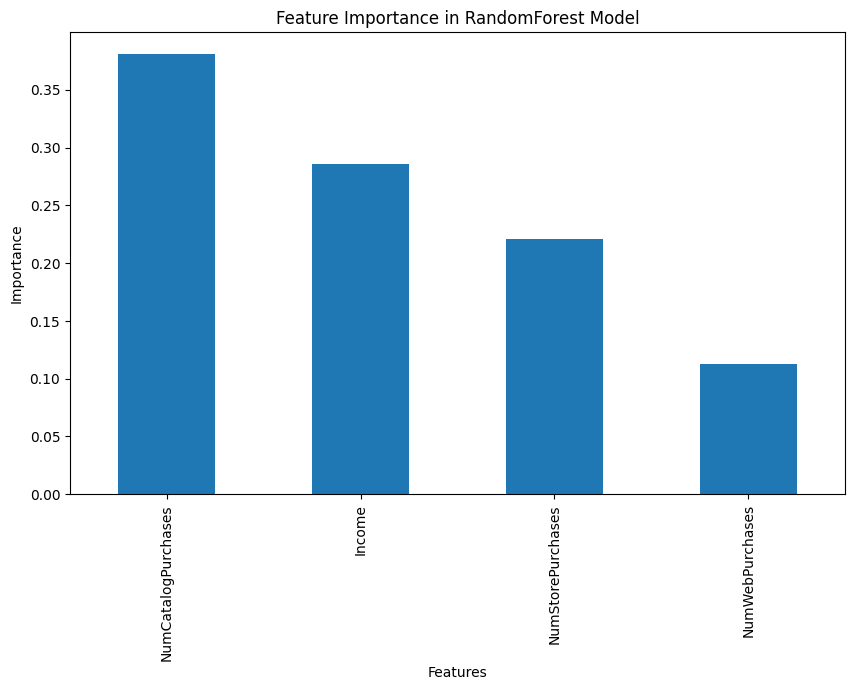

In [ ]:
# Assuming 'model' is your trained RandomForestRegressor
feature_importances = model.feature_importances_

# Get the feature names from your dataset
# This assumes you have a DataFrame X_train with appropriate column names
feature_names = X_train.columns

# Create a series to view the feature importances
importances = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Plot the sorted importances
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importance in RandomForest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# Visualisation

### Scatter Plot

Plots the actual values from the test set against the predicted values. The line of "Ideal Fit" represents where the points would lie if the predictions were perfect.

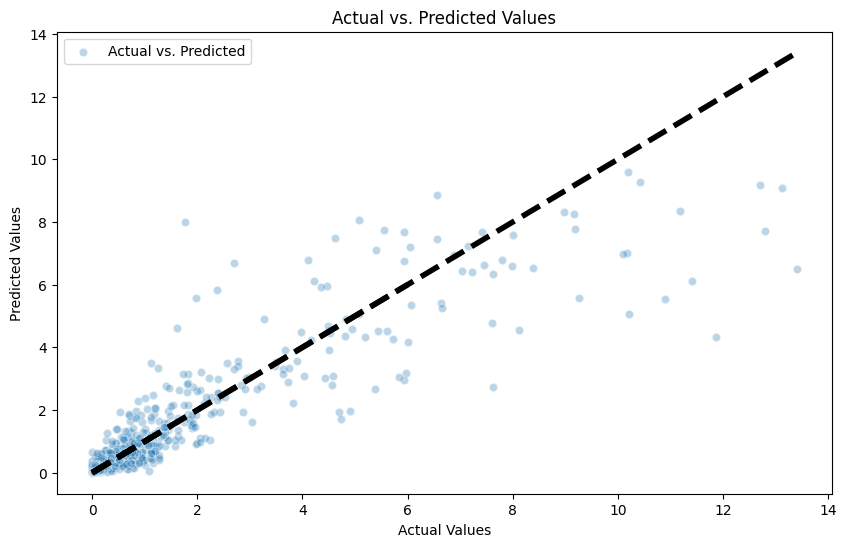

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, edgecolors='w', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### Multiple decision trees

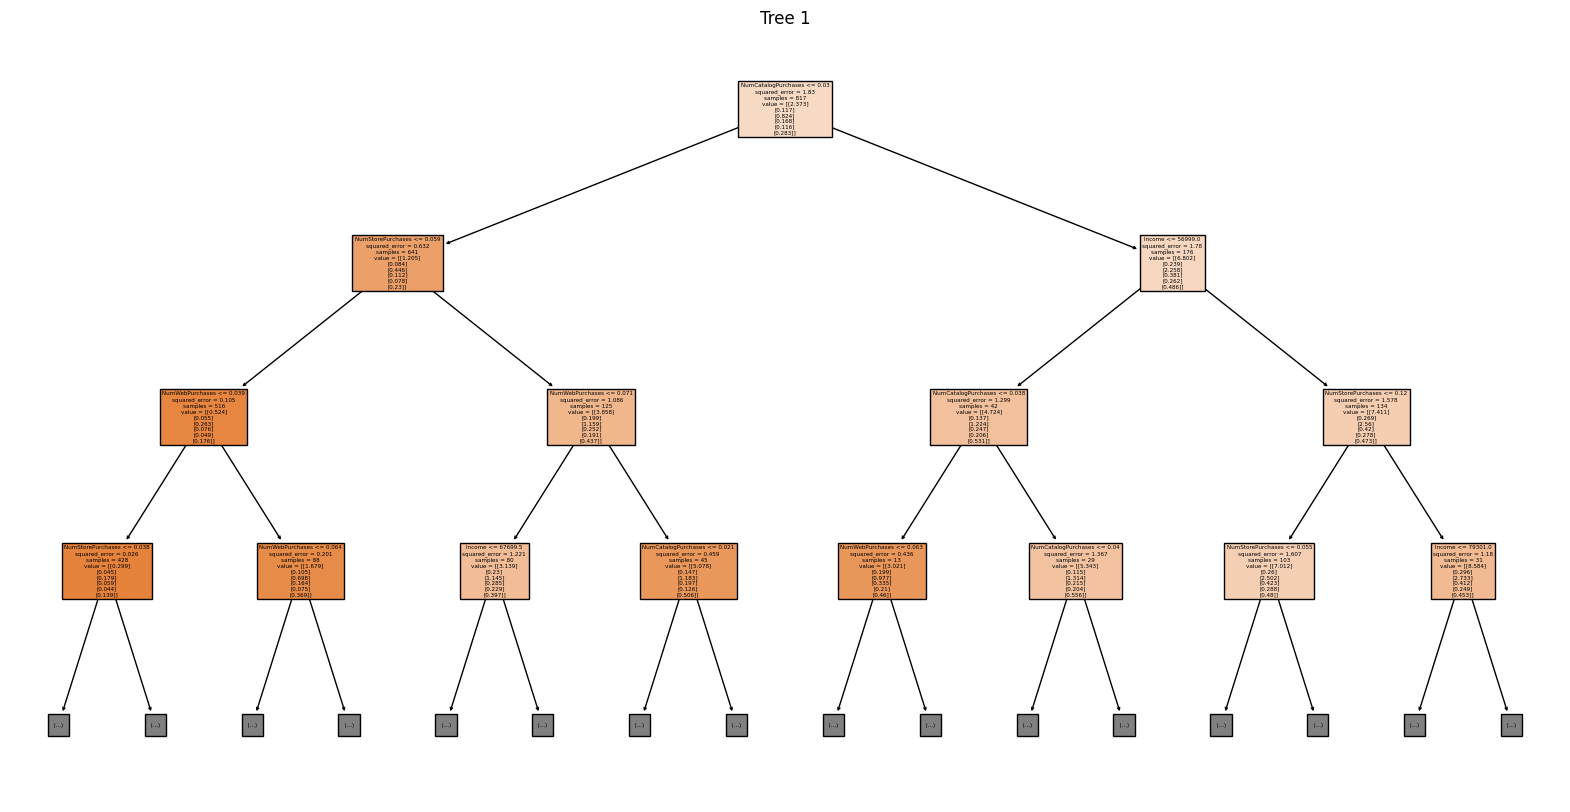

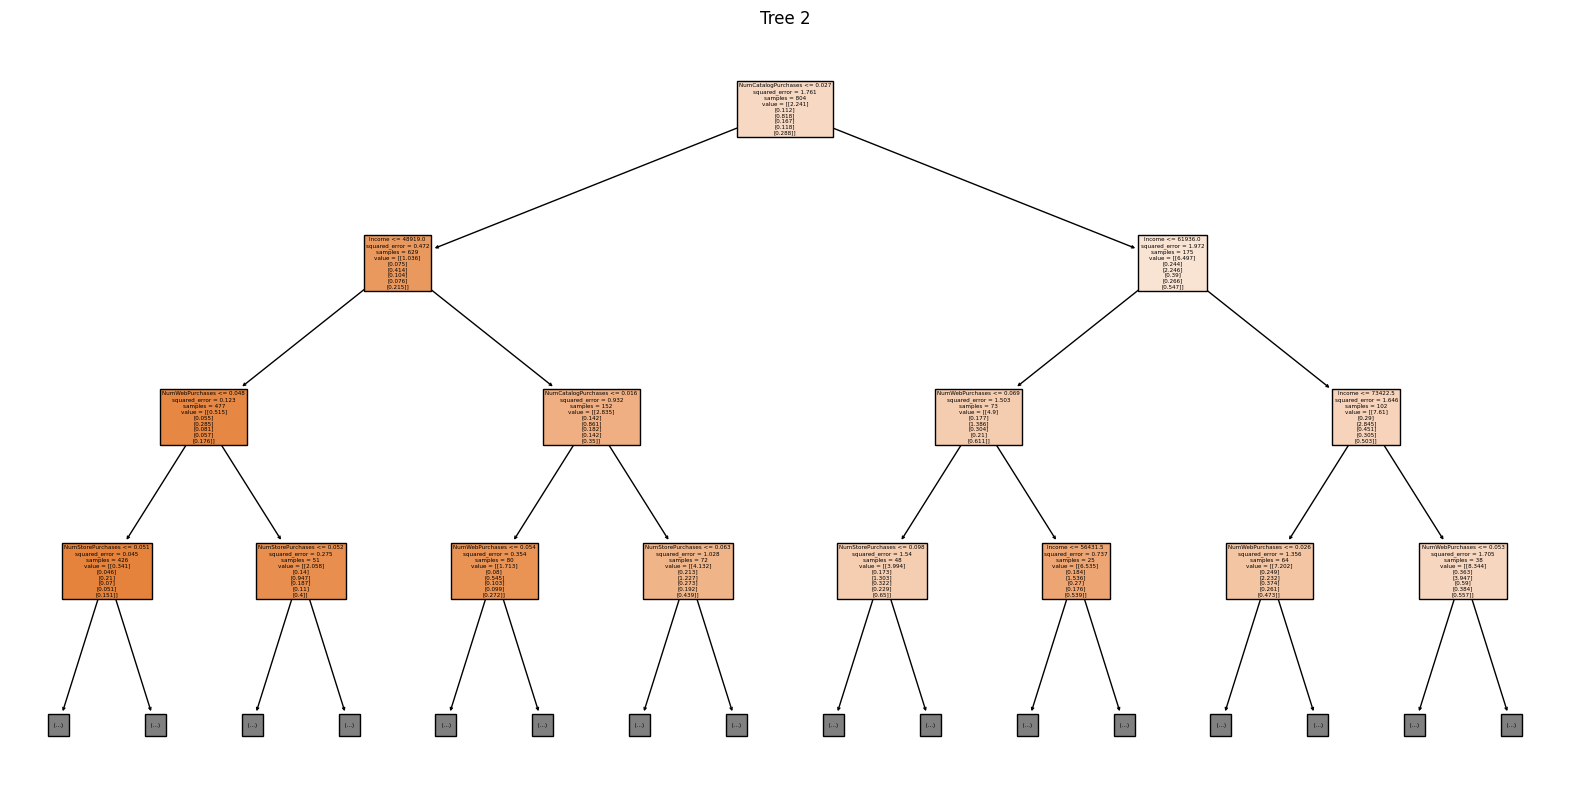

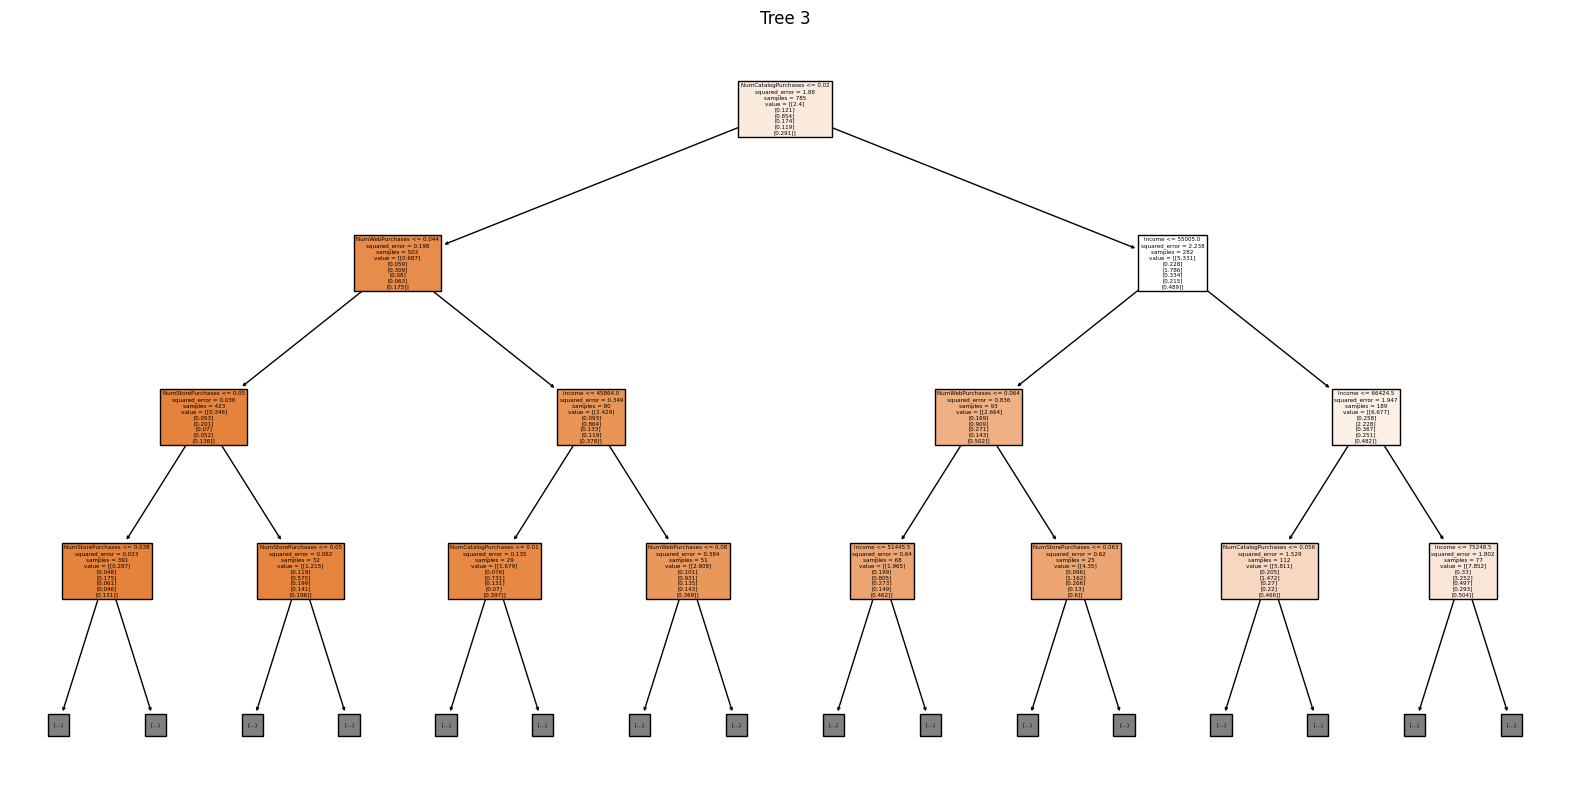

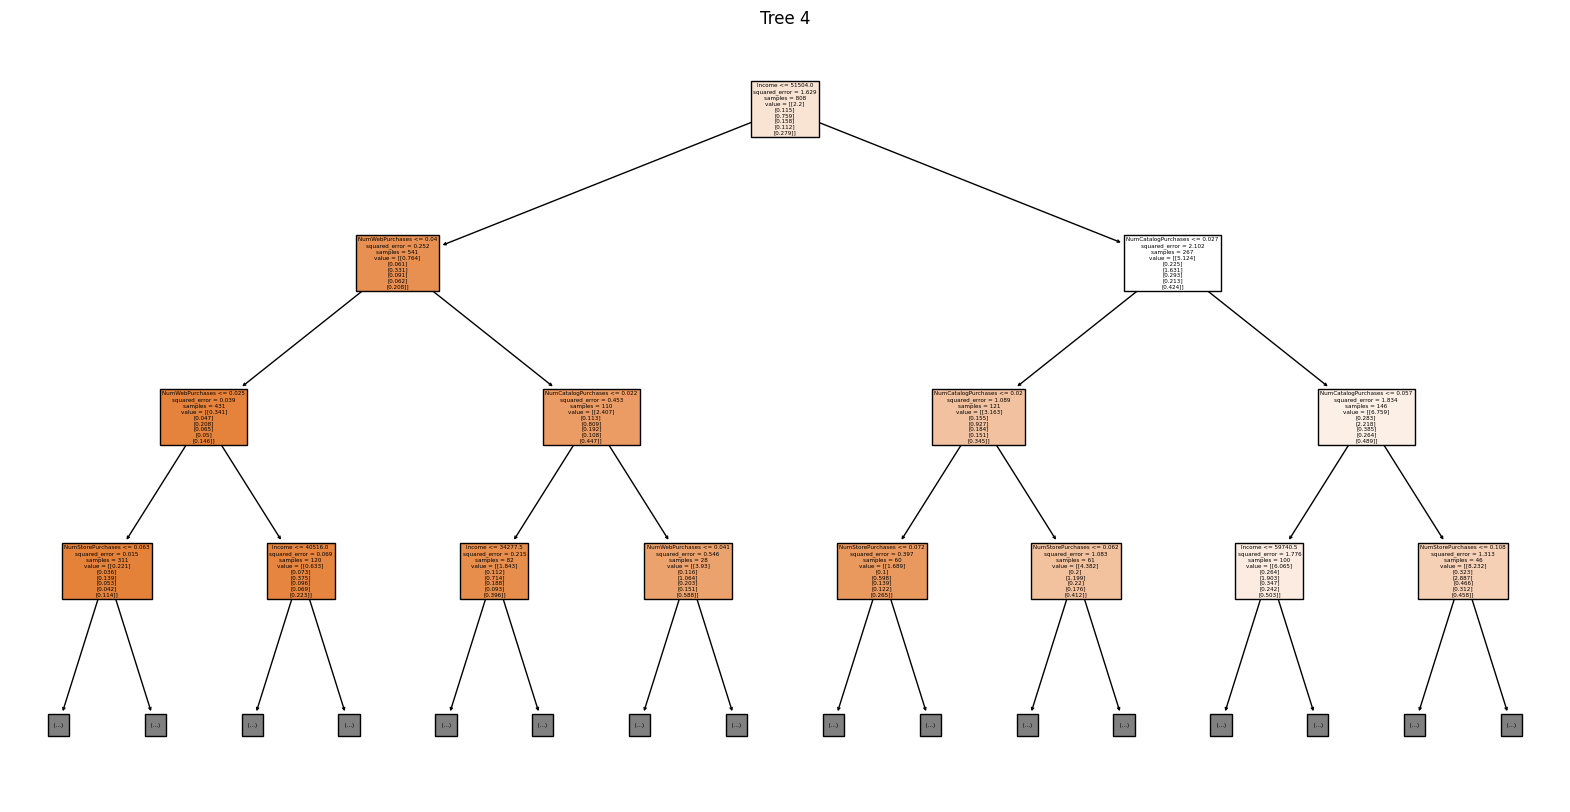

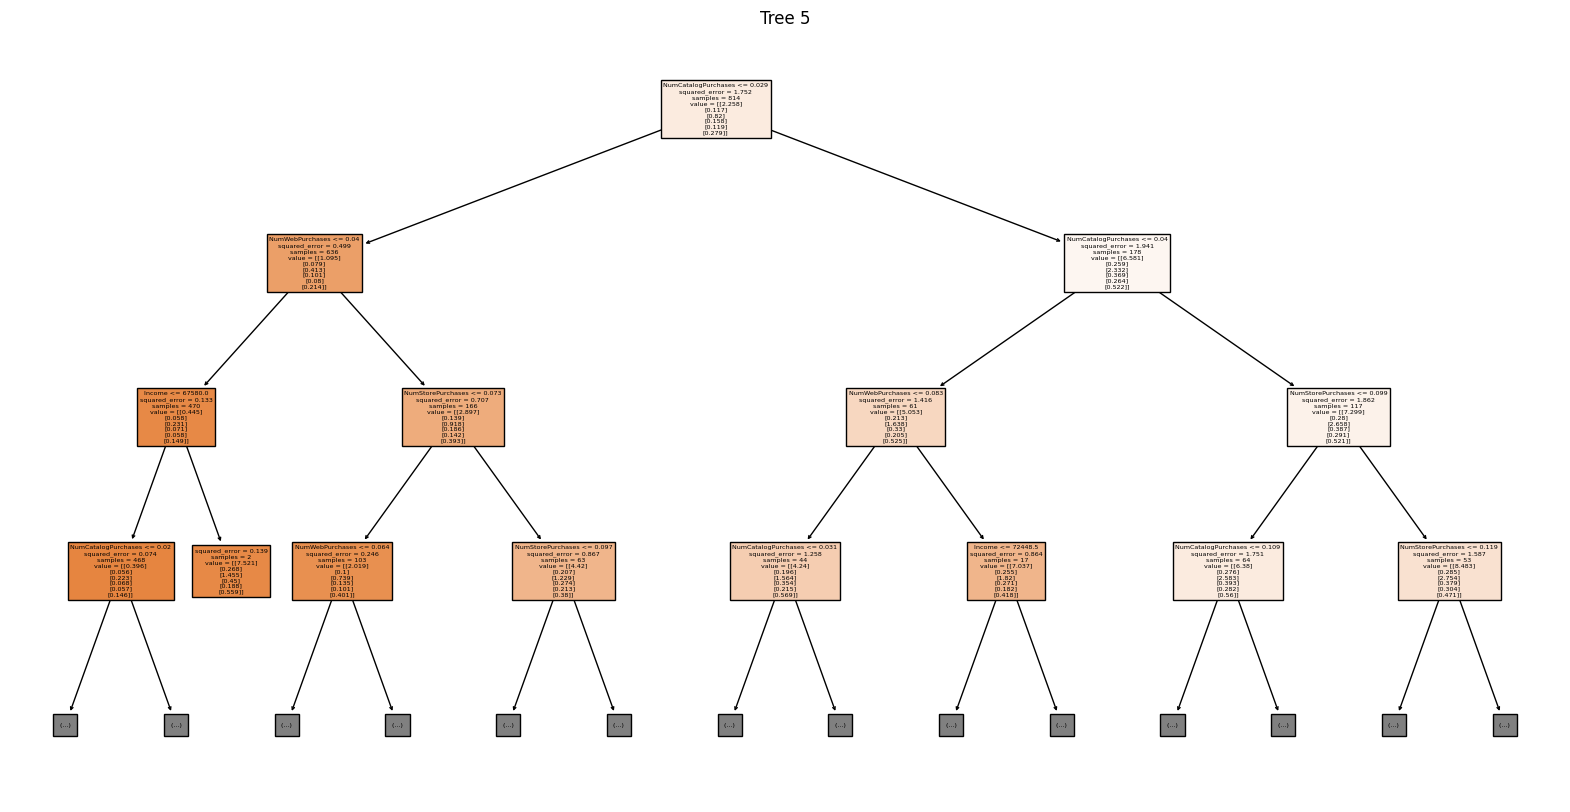

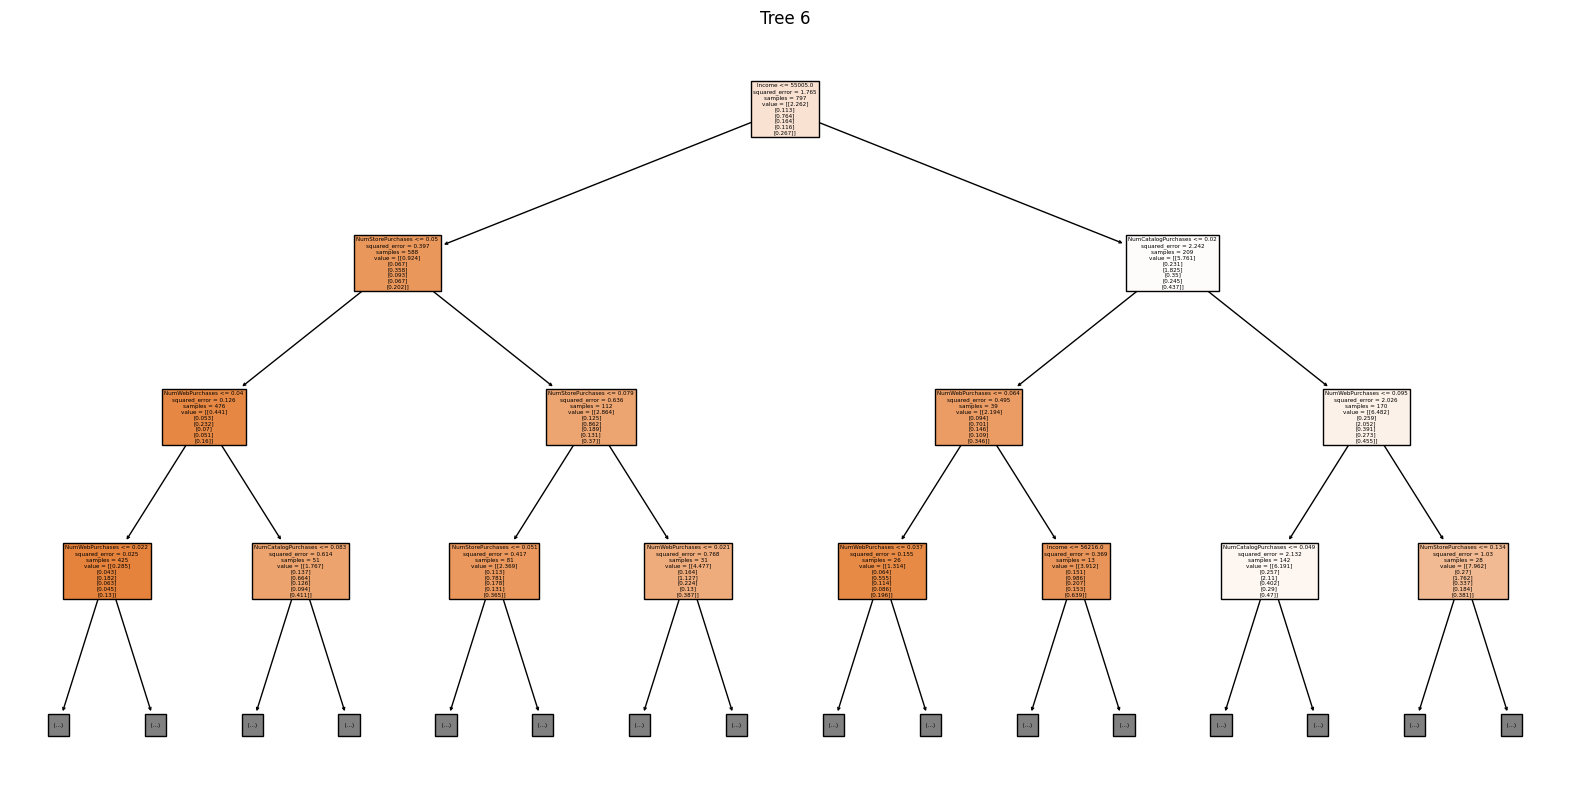

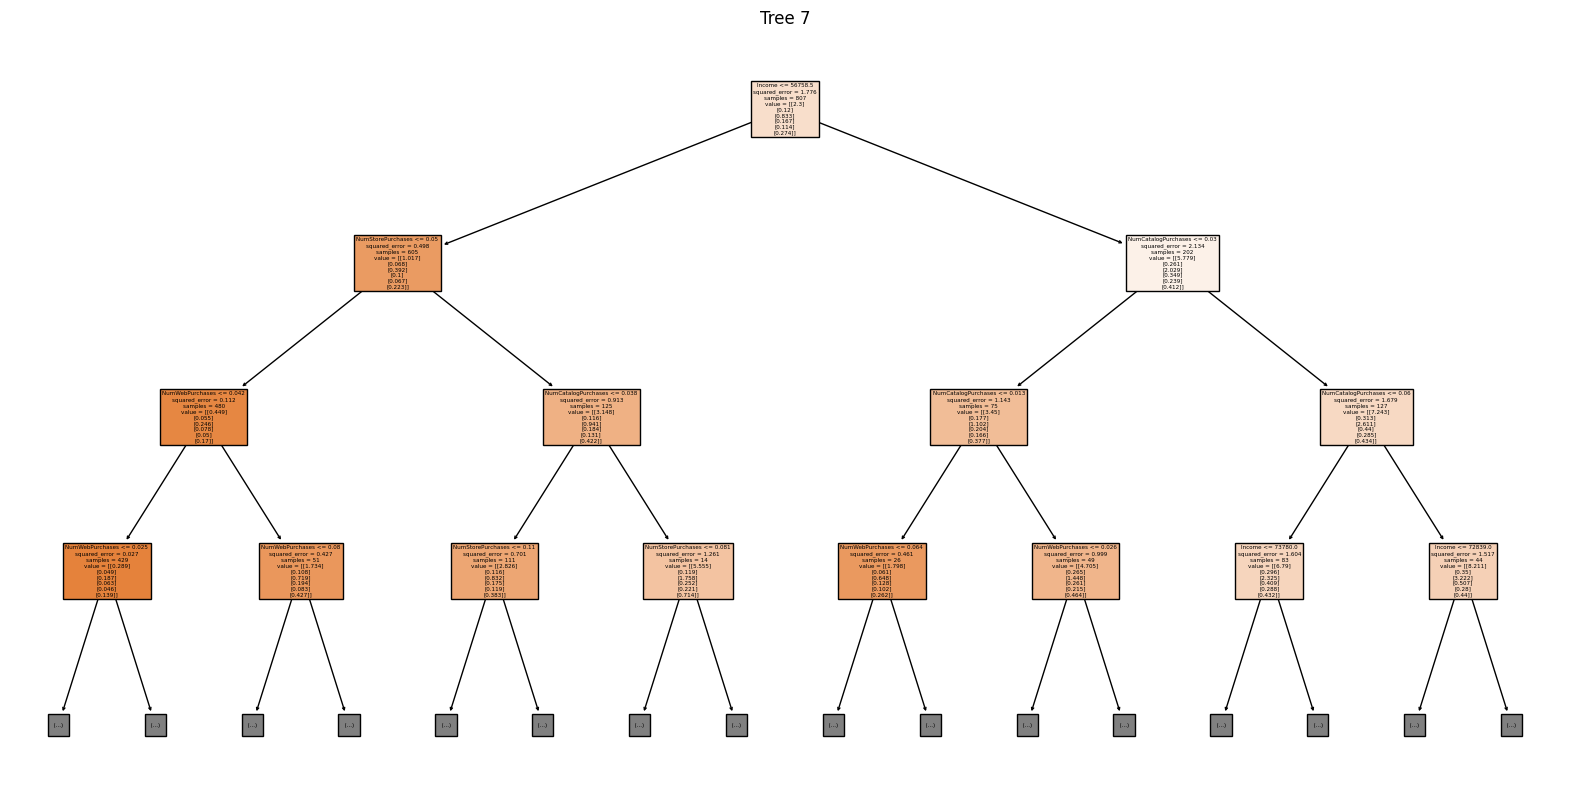

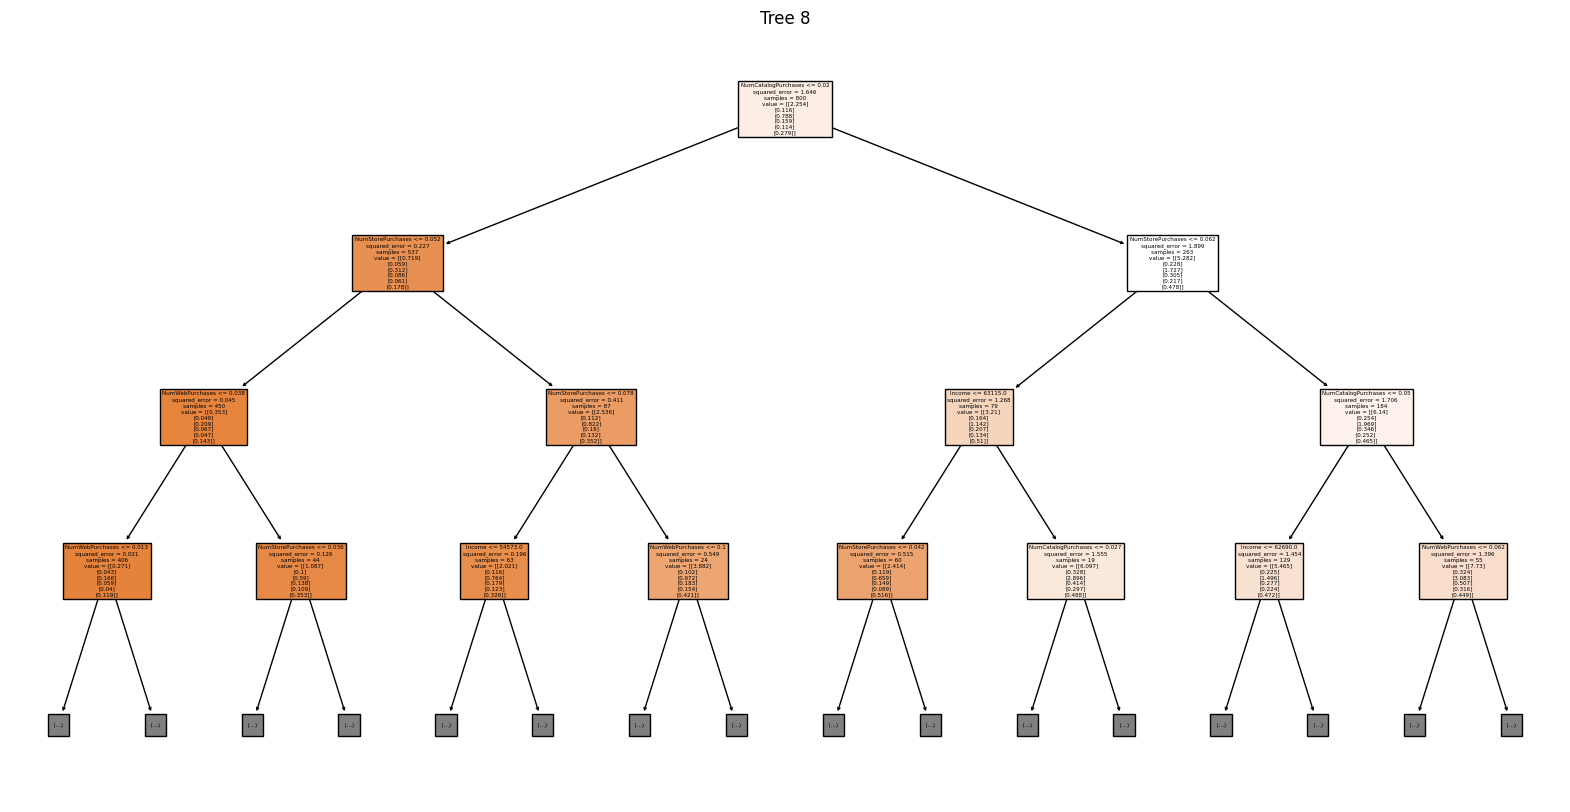

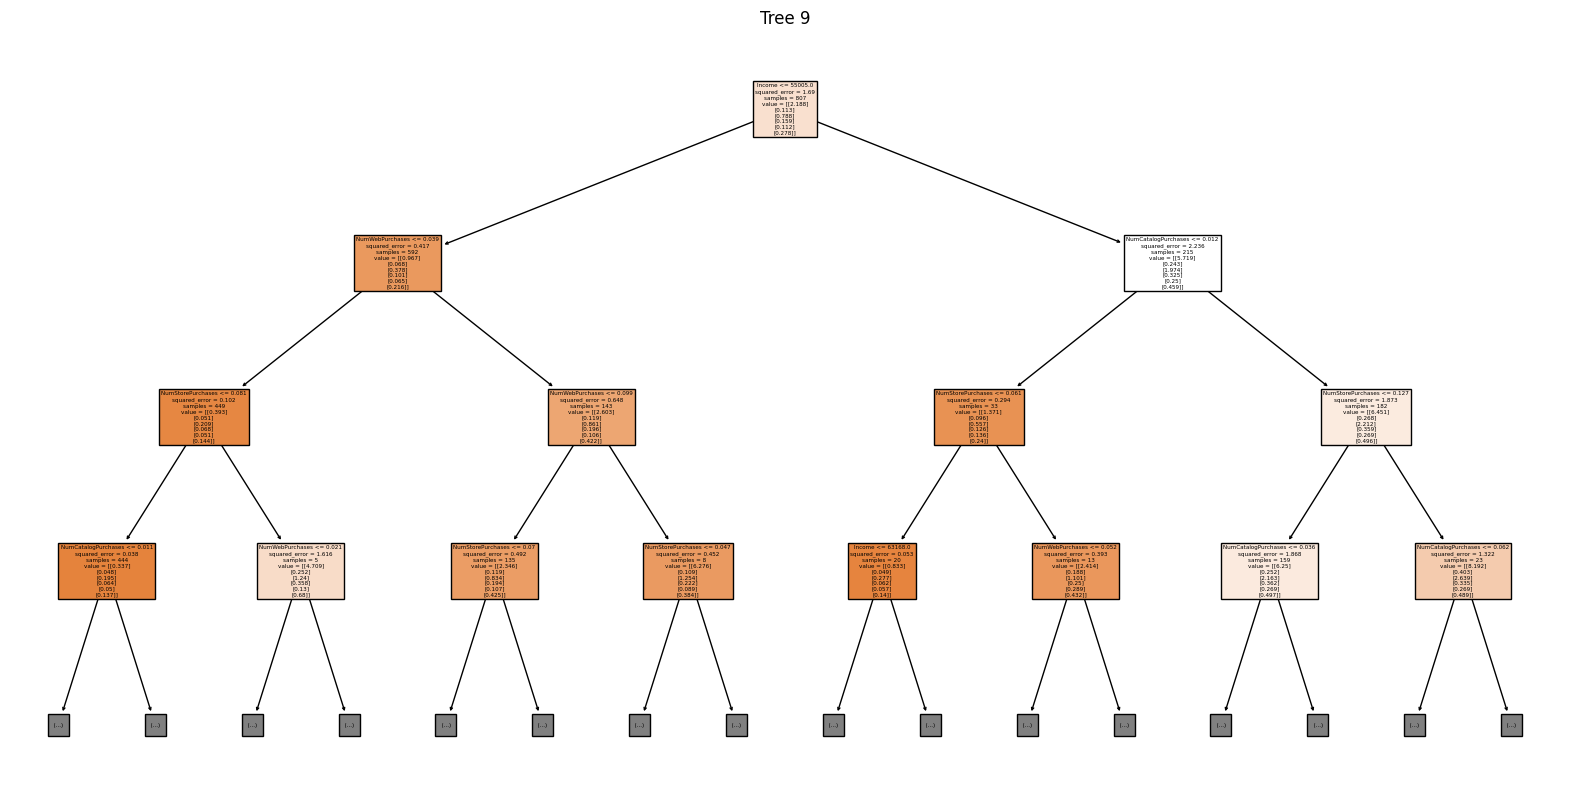

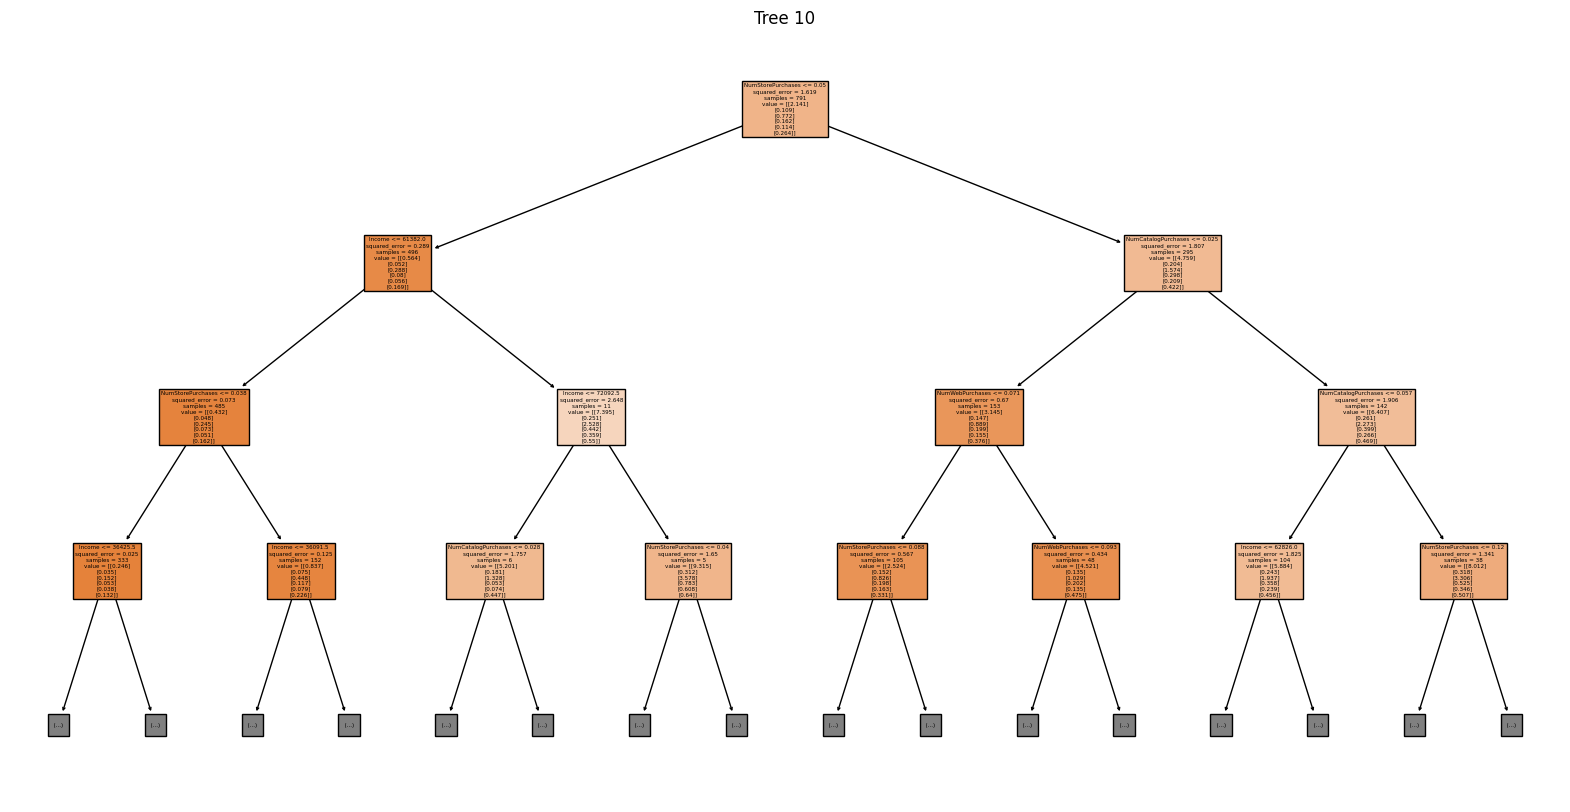

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'rf' is your trained RandomForestRegressor model
estimators = model.estimators_

# Select 10 random trees to display
selected_trees = [estimators[i] for i in sorted(np.random.choice(len(estimators), 10, replace=False))]

# Plot each of the selected trees
for i, tree in enumerate(selected_trees):
    plt.figure(figsize=(20, 10))
    plot_tree(tree, filled=True, feature_names=X.columns, max_depth=3)
    plt.title(f'Tree {i+1}')
    plt.show()
